In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt
sns.set_theme(style="ticks", palette="pastel")

In [2]:
metrics_dict = pd.read_pickle('metrics_dict.pkl')

In [3]:
cm1 = {'None':{
    'KNORA-U': metrics_dict['cm1']['None']['F-KNU'],
    'KNORA-E': metrics_dict['cm1']['None']['F-KNE'],
    'OLA':metrics_dict['cm1']['None']['F-OLA'],
    'LCA':metrics_dict['cm1']['None']['F-LCA'],
    'MCB':metrics_dict['cm1']['None']['F-MCB'],
    'Bagging':metrics_dict['cm1']['None']['Bagging']},
       'Hard': {
    'KNORA-U': metrics_dict['cm1']['Hard']['F-KNU'],
    'KNORA-E': metrics_dict['cm1']['Hard']['F-KNE'],
    'OLA':metrics_dict['cm1']['Hard']['F-OLA'],
    'LCA':metrics_dict['cm1']['Hard']['F-LCA'],
    'MCB':metrics_dict['cm1']['Hard']['F-MCB'],
    'Bagging':metrics_dict['cm1']['Hard']['Bagging']},
       'Easy':{
    'KNORA-U': metrics_dict['cm1']['Easy']['F-KNU'],
    'KNORA-E': metrics_dict['cm1']['Easy']['F-KNE'],
    'OLA':metrics_dict['cm1']['Easy']['F-OLA'],
    'LCA':metrics_dict['cm1']['Easy']['F-LCA'],
    'MCB':metrics_dict['cm1']['Easy']['F-MCB'],
    'Bagging':metrics_dict['cm1']['Easy']['Bagging']}
      }

pc1 = {'None':{
    'KNORA-U': metrics_dict['pc1']['None']['F-KNU'],
    'KNORA-E': metrics_dict['pc1']['None']['F-KNE'],
    'OLA':metrics_dict['pc1']['None']['F-OLA'],
    'LCA':metrics_dict['pc1']['None']['F-LCA'],
    'MCB':metrics_dict['pc1']['None']['F-MCB'],
    'Bagging':metrics_dict['pc1']['None']['Bagging']},
       'Hard': {
    'KNORA-U': metrics_dict['pc1']['Hard']['F-KNU'],
    'KNORA-E': metrics_dict['pc1']['Hard']['F-KNE'],
    'OLA':metrics_dict['pc1']['Hard']['F-OLA'],
    'LCA':metrics_dict['pc1']['Hard']['F-LCA'],
    'MCB':metrics_dict['pc1']['Hard']['F-MCB'],
    'Bagging':metrics_dict['pc1']['Hard']['Bagging']},
       'Easy':{
    'KNORA-U': metrics_dict['pc1']['Easy']['F-KNU'],
    'KNORA-E': metrics_dict['pc1']['Easy']['F-KNE'],
    'OLA':metrics_dict['pc1']['Easy']['F-OLA'],
    'LCA':metrics_dict['pc1']['Easy']['F-LCA'],
    'MCB':metrics_dict['pc1']['Easy']['F-MCB'],
    'Bagging':metrics_dict['pc1']['Easy']['Bagging']}
      }

In [4]:
df = pd.DataFrame(pd.concat({'cm1': pd.DataFrame(cm1).unstack(), 'pc1':pd.DataFrame(pc1).unstack()}))

In [5]:
cm1 = df[0].loc['cm1'].apply(lambda x : pd.DataFrame(x)).unstack()
pc1 = df[0].loc['pc1'].apply(lambda x : pd.DataFrame(x)).unstack()
# df = pd.concat({'cm1':cm1, 'pc1':pc1}, axis = 1)

In [6]:
cm1['KNORA-U'].loc['None']

,auc_roc,g1,f1,acc
0,0.855986,0.802902,0.791649,0.910714
1,0.871137,0.813411,0.800683,0.913690
2,0.859586,0.790023,0.769072,0.892857
3,0.817132,0.786389,0.782379,0.913690
4,0.876088,0.824980,0.815541,0.922619
5,0.919892,0.851857,0.836735,0.928571
6,0.923492,0.837272,0.811094,0.910714
7,0.852685,0.795753,0.782313,0.904762
8,0.886735,0.823488,0.808547,0.913690
9,0.903090,0.837836,0.823129,0.922619


### Importando os dados estatísticos

In [7]:
metrics_summary = pd.read_pickle('metrics/metrics_summary.pkl')
metrics_summary.head()

,set,hardness,strategy,mean_auc_roc,std_auc_roc,mean_acc,std_acc,mean_f1,std_f1,mean_g1,std_g1
0,cm1,None,F-KNU,0.876582,0.031194,0.913393,0.009547,0.802114,0.019818,0.816391,0.021190
1,cm1,None,F-KNE,0.991764,0.010223,0.997321,0.002808,0.992425,0.007932,0.992507,0.007847
2,cm1,None,F-OLA,0.920052,0.017951,0.960119,0.008748,0.894909,0.019944,0.897005,0.018800
3,cm1,None,F-LCA,0.816477,0.041283,0.831548,0.023061,0.691582,0.030565,0.734800,0.030309
4,cm1,None,F-MCB,0.926864,0.018525,0.965179,0.008528,0.907025,0.020304,0.908690,0.019321


In [8]:
replace_str = {'F-KNU': 'KNORA-U', 'F-KNE': 'KNORA-E', 'F-OLA': 'OLA', 'F-LCA': 'LCA', 
               'F-MCB': 'MCB', 'None': 'Nenhuma', 'Hard': 'Difícil', 'Easy': 'Fácil'}
metrics_summary.replace(replace_str, inplace=True)

In [9]:
cm1_summary = metrics_summary.set_index('set').loc['cm1']
pc1_summary = metrics_summary.set_index('set').loc['pc1']

In [10]:
cm1_summary

,hardness,strategy,mean_auc_roc,std_auc_roc,mean_acc,std_acc,mean_f1,std_f1,mean_g1,std_g1
set,,,,,,,,,,
cm1,Nenhuma,KNORA-U,0.876582,0.031194,0.913393,0.009547,0.802114,0.019818,0.816391,0.021190
cm1,Nenhuma,KNORA-E,0.991764,0.010223,0.997321,0.002808,0.992425,0.007932,0.992507,0.007847
cm1,Nenhuma,OLA,0.920052,0.017951,0.960119,0.008748,0.894909,0.019944,0.897005,0.018800
cm1,Nenhuma,LCA,0.816477,0.041283,0.831548,0.023061,0.691582,0.030565,0.734800,0.030309
cm1,Nenhuma,MCB,0.926864,0.018525,0.965179,0.008528,0.907025,0.020304,0.908690,0.019321
cm1,Nenhuma,Bagging,0.577707,0.045950,0.900893,0.011219,0.598614,0.062779,0.632189,0.060243
cm1,Difícil,KNORA-U,0.634464,0.077157,0.494200,0.058534,0.468211,0.062390,0.605660,0.058716
cm1,Difícil,KNORA-E,0.982043,0.015540,0.969682,0.027154,0.945935,0.053893,0.952038,0.045141
cm1,Difícil,OLA,0.808217,0.089670,0.851608,0.043643,0.761143,0.070774,0.772658,0.072542


In [11]:
pc1_summary.round(3)

,hardness,strategy,mean_auc_roc,std_auc_roc,mean_acc,std_acc,mean_f1,std_f1,mean_g1,std_g1
set,,,,,,,,,,
pc1,Nenhuma,KNORA-U,0.867,0.028,0.932,0.008,0.791,0.021,0.804,0.021
pc1,Nenhuma,KNORA-E,0.959,0.014,0.992,0.002,0.970,0.007,0.970,0.007
pc1,Nenhuma,OLA,0.914,0.022,0.960,0.006,0.865,0.019,0.870,0.019
pc1,Nenhuma,LCA,0.806,0.041,0.897,0.013,0.714,0.027,0.737,0.029
pc1,Nenhuma,MCB,0.912,0.025,0.962,0.007,0.867,0.023,0.872,0.023
pc1,Nenhuma,Bagging,0.564,0.025,0.932,0.003,0.589,0.035,0.642,0.032
pc1,Difícil,KNORA-U,0.691,0.047,0.576,0.034,0.564,0.034,0.667,0.039
pc1,Difícil,KNORA-E,0.953,0.031,0.931,0.044,0.913,0.056,0.922,0.046
pc1,Difícil,OLA,0.798,0.075,0.787,0.066,0.743,0.078,0.765,0.072


In [23]:
cm1_summary.round(3).to_latex()

'\\begin{tabular}{lllrrrrrrrr}\n\\toprule\n{} & hardness & strategy &  mean\\_auc\\_roc &  std\\_auc\\_roc &  mean\\_acc &  std\\_acc &  mean\\_f1 &  std\\_f1 &  mean\\_g1 &  std\\_g1 \\\\\nset &          &          &               &              &           &          &          &         &          &         \\\\\n\\midrule\ncm1 &  Nenhuma &  KNORA-U &         0.877 &        0.031 &     0.913 &    0.010 &    0.802 &   0.020 &    0.816 &   0.021 \\\\\ncm1 &  Nenhuma &  KNORA-E &         0.992 &        0.010 &     0.997 &    0.003 &    0.992 &   0.008 &    0.993 &   0.008 \\\\\ncm1 &  Nenhuma &      OLA &         0.920 &        0.018 &     0.960 &    0.009 &    0.895 &   0.020 &    0.897 &   0.019 \\\\\ncm1 &  Nenhuma &      LCA &         0.816 &        0.041 &     0.832 &    0.023 &    0.692 &   0.031 &    0.735 &   0.030 \\\\\ncm1 &  Nenhuma &      MCB &         0.927 &        0.019 &     0.965 &    0.009 &    0.907 &   0.020 &    0.909 &   0.019 \\\\\ncm1 &  Nenhuma &  Bagging &    

In [26]:
pc1_summary.round(3).to_latex()

'\\begin{tabular}{lllrrrrrrrr}\n\\toprule\n{} & hardness & strategy &  mean\\_auc\\_roc &  std\\_auc\\_roc &  mean\\_acc &  std\\_acc &  mean\\_f1 &  std\\_f1 &  mean\\_g1 &  std\\_g1 \\\\\nset &          &          &               &              &           &          &          &         &          &         \\\\\n\\midrule\npc1 &  Nenhuma &  KNORA-U &         0.867 &        0.028 &     0.932 &    0.008 &    0.791 &   0.021 &    0.804 &   0.021 \\\\\npc1 &  Nenhuma &  KNORA-E &         0.959 &        0.014 &     0.992 &    0.002 &    0.970 &   0.007 &    0.970 &   0.007 \\\\\npc1 &  Nenhuma &      OLA &         0.914 &        0.022 &     0.960 &    0.006 &    0.865 &   0.019 &    0.870 &   0.019 \\\\\npc1 &  Nenhuma &      LCA &         0.806 &        0.041 &     0.897 &    0.013 &    0.714 &   0.027 &    0.737 &   0.029 \\\\\npc1 &  Nenhuma &      MCB &         0.912 &        0.025 &     0.962 &    0.007 &    0.867 &   0.023 &    0.872 &   0.023 \\\\\npc1 &  Nenhuma &  Bagging &    

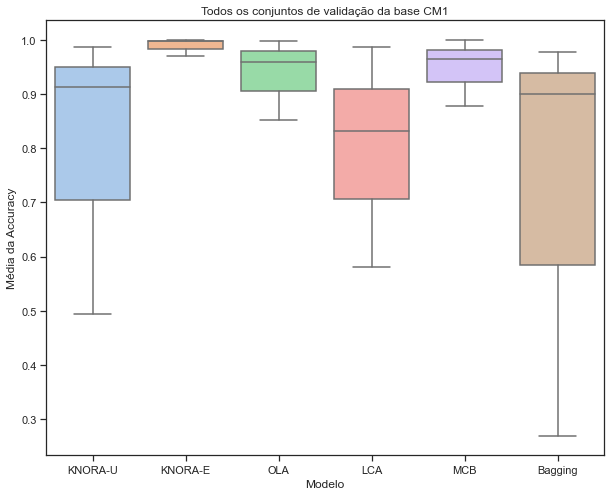

In [27]:
plt.figure(figsize=(10,8))
sns.boxplot(y='mean_acc', x='strategy', data = cm1_summary)
plt.title('Todos os conjuntos de validação da base CM1')
plt.ylabel('Média da Accuracy')
plt.xlabel('Modelo')
plt.savefig('boxplot_cm1_acc_todas_cm1.png')
plt.show()

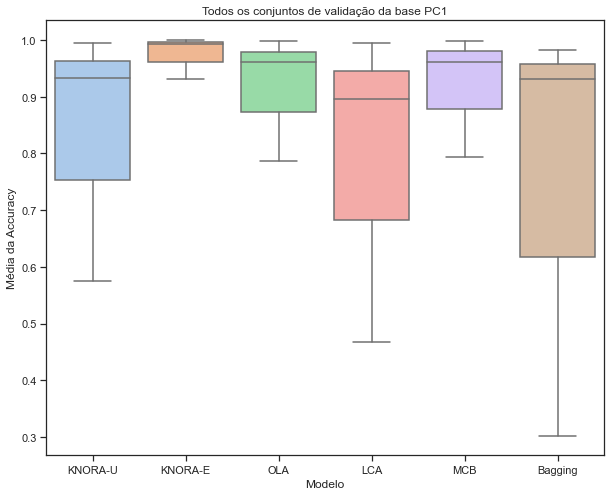

In [28]:
plt.figure(figsize=(10,8))
sns.boxplot(y='mean_acc', x='strategy',data = pc1_summary)
plt.title('Todos os conjuntos de validação da base PC1')
plt.ylabel('Média da Accuracy')
plt.xlabel('Modelo')
plt.savefig('boxplot_cm1_acc_todas_pc1.png')
plt.show()

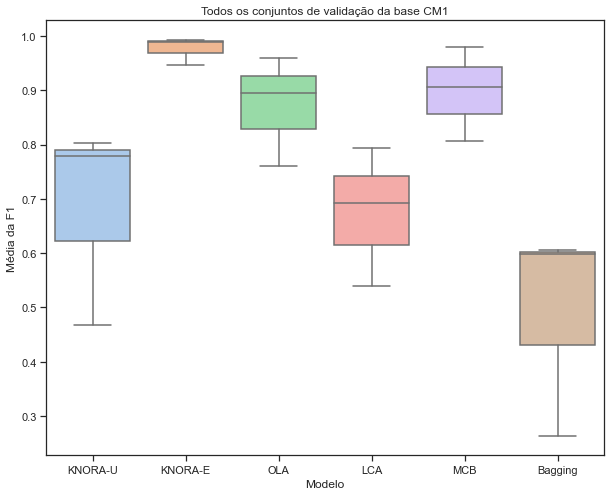

In [14]:
plt.figure(figsize=(10,8))
sns.boxplot(y='mean_f1', x='strategy',data = cm1_summary)
plt.title('Todos os conjuntos de validação da base CM1')
plt.ylabel('Média da F1')
plt.xlabel('Modelo')
plt.savefig('boxplot_f1_gmean_todas_cm1.png')
plt.show()

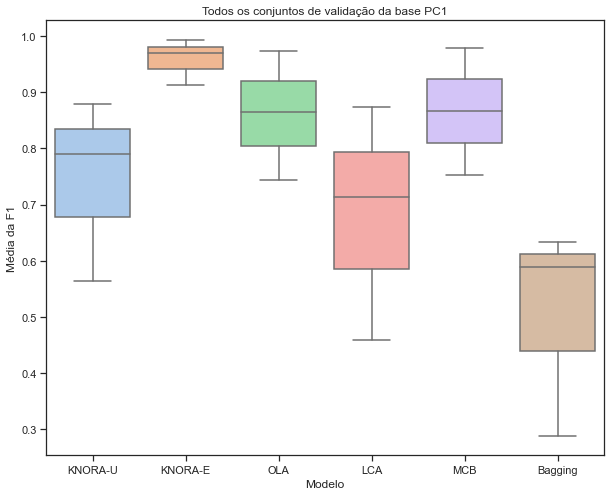

In [15]:
plt.figure(figsize=(10,8))
sns.boxplot(y='mean_f1', x='strategy',data = pc1_summary)
plt.title('Todos os conjuntos de validação da base PC1')
plt.ylabel('Média da F1')
plt.xlabel('Modelo')
plt.savefig('boxplot_f1_gmean_todas_pc1.png')
plt.show()

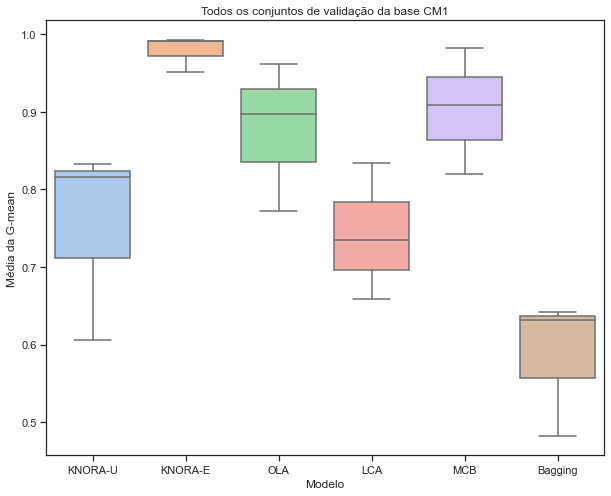

In [39]:
plt.figure(figsize=(10,8))
sns.boxplot(y='mean_g1', x='strategy',data = cm1_summary)
plt.title('Todos os conjuntos de validação da base CM1')
plt.ylabel('Média da G-mean')
plt.xlabel('Modelo')
plt.savefig('boxplot_cm1_gmean_todas_cm1.png')
plt.show()

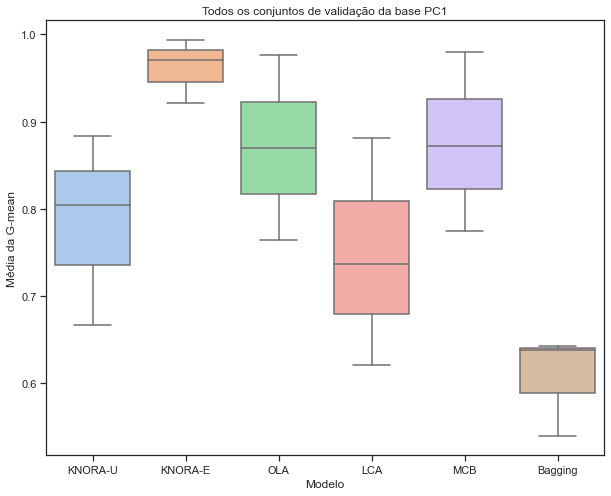

In [40]:
plt.figure(figsize=(10,8))
sns.boxplot(y='mean_g1', x='strategy',data = pc1_summary)
plt.title('Todos os conjuntos de validação da base PC1')
plt.ylabel('Média da G-mean')
plt.xlabel('Modelo')
plt.savefig('boxplot_cm1_gmean_todas_pc1.png')
plt.show()

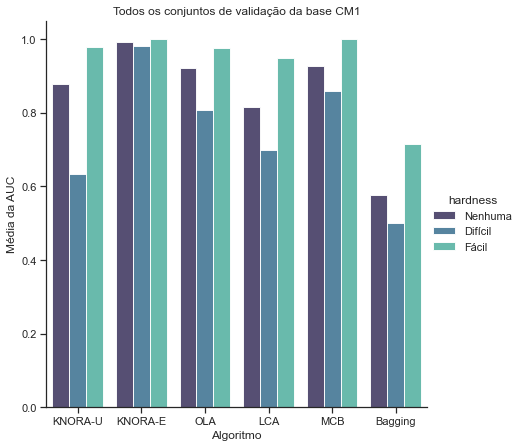

In [36]:
sns.catplot(data = cm1_summary,
            kind='bar', x = 'strategy', y = 'mean_auc_roc',
                hue='hardness', alpha=0.9, height=6, palette = "mako")
plt.title('Todos os conjuntos de validação da base CM1')
plt.ylabel('Média da AUC')
plt.xlabel('Algoritmo')
plt.savefig('barplot_med_auc_cm1.png')
plt.show()

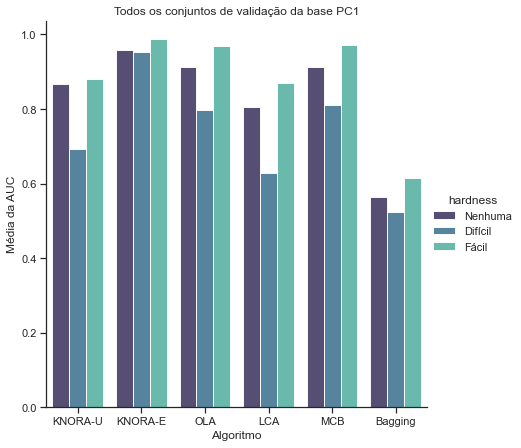

In [29]:

sns.catplot(data = pc1_summary,
            kind='bar', x = 'strategy', y = 'mean_auc_roc',
                hue='hardness', alpha=0.9, height=6, palette = "mako")
plt.title('Todos os conjuntos de validação da base PC1')
plt.ylabel('Média da AUC')
plt.xlabel('Algoritmo')
plt.savefig('barplot_med_auc_pc1.png')
plt.show()

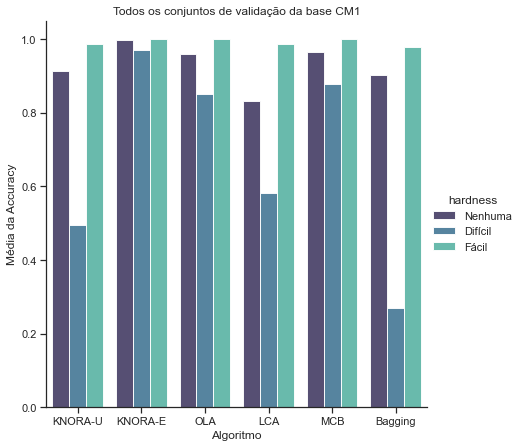

In [17]:

sns.catplot(data = cm1_summary,
            kind='bar', x = 'strategy', y = 'mean_acc',
                hue='hardness', alpha=0.9, height=6, palette = "mako")
plt.title('Todos os conjuntos de validação da base CM1')
plt.ylabel('Média da Accuracy')
plt.xlabel('Algoritmo')
plt.savefig('barplot_med_acc_cm1.png')
plt.show()

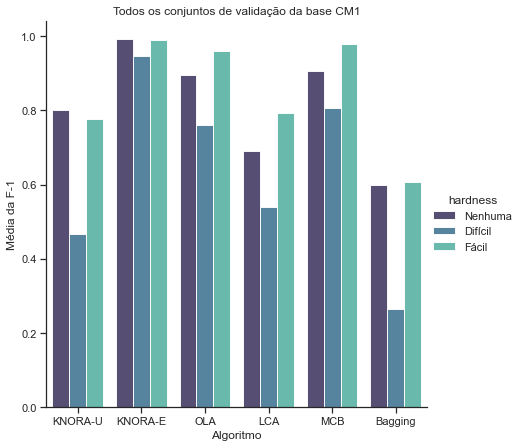

In [13]:
sns.catplot(data = cm1_summary,
            kind='bar', x = 'strategy', y = 'mean_f1',
                hue='hardness', alpha=0.9, height=6, palette = "mako")
plt.title('Todos os conjuntos de validação da base CM1')
plt.ylabel('Média da F-1')
plt.xlabel('Algoritmo')
plt.savefig('barplot_med_f1_cm1.png')
plt.show()

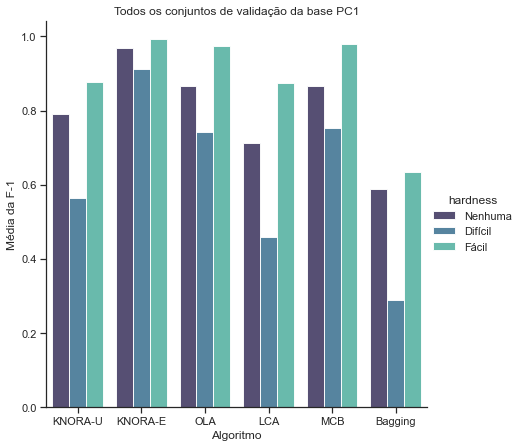

In [16]:
sns.catplot(data = pc1_summary,
            kind='bar', x = 'strategy', y = 'mean_f1',
                hue='hardness', alpha=0.9, height=6, palette = "mako")
plt.title('Todos os conjuntos de validação da base PC1')
plt.ylabel('Média da F-1')
plt.xlabel('Algoritmo')
plt.savefig('barplot_med_f1_pc1.png')
plt.show()

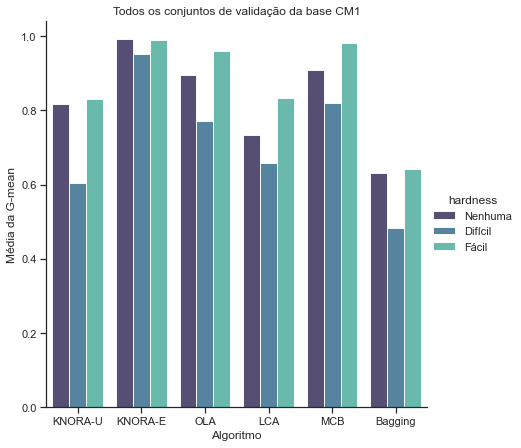

In [19]:
sns.catplot(data = cm1_summary,
            kind='bar', x = 'strategy', y = 'mean_g1',
                hue='hardness', alpha=0.9, height=6, palette = "mako")
plt.title('Todos os conjuntos de validação da base CM1')
plt.ylabel('Média da G-mean')
plt.xlabel('Algoritmo')
plt.savefig('barplot_med_g1_cm1.png')
plt.show()